# L1 语言模型，提问范式与token

## 设置
#### 加载API key和一些python的库。
在本课程中，我们提供了一些为您加载 OpenAI API 密钥的代码。

In [4]:
!pip install openai
!pip install langchain
!pip install --upgrade tiktoken

In [1]:
import os
import openai
# import tiktoken 这个后面没用到，想知道这个是什么用处，可以看看我的这篇文章：https://zhuanlan.zhihu.com/p/629776230

# from dotenv import load_dotenv, find_dotenv
# _ = load_dotenv(find_dotenv()) # 读取本地的.env环境文件

openai.api_key  = '***' #更换成你自己的key

#### Helper function 辅助函数
如果参加过之前的“ChatGPT Prompt Engineering for Developers”课程，这个就比较熟悉了。

In [2]:
# 官方文档要求这么写的 https://platform.openai.com/overview

def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0,
    )
    return response.choices[0].message["content"]

## 尝试向模型提问并得到结果

In [18]:
response = get_completion("中国的首都是哪里？")

In [19]:
print(response)

中国的首都是北京。


## Tokens


In [19]:
# 为了更好展示效果，这里就没有翻译成中文的prompt
# 注意看这里让字母翻转，出错了，吴教授就是用这里例子引出来，token是怎么计算的

response = get_completion("Take the letters in lollipop \
and reverse them")
print(response)

ppilolol


In [18]:
response = get_completion("""Take the letters in \
l-o-l-l-i-p-o-p and reverse them""")
print(response)

p-o-p-i-l-l-o-l


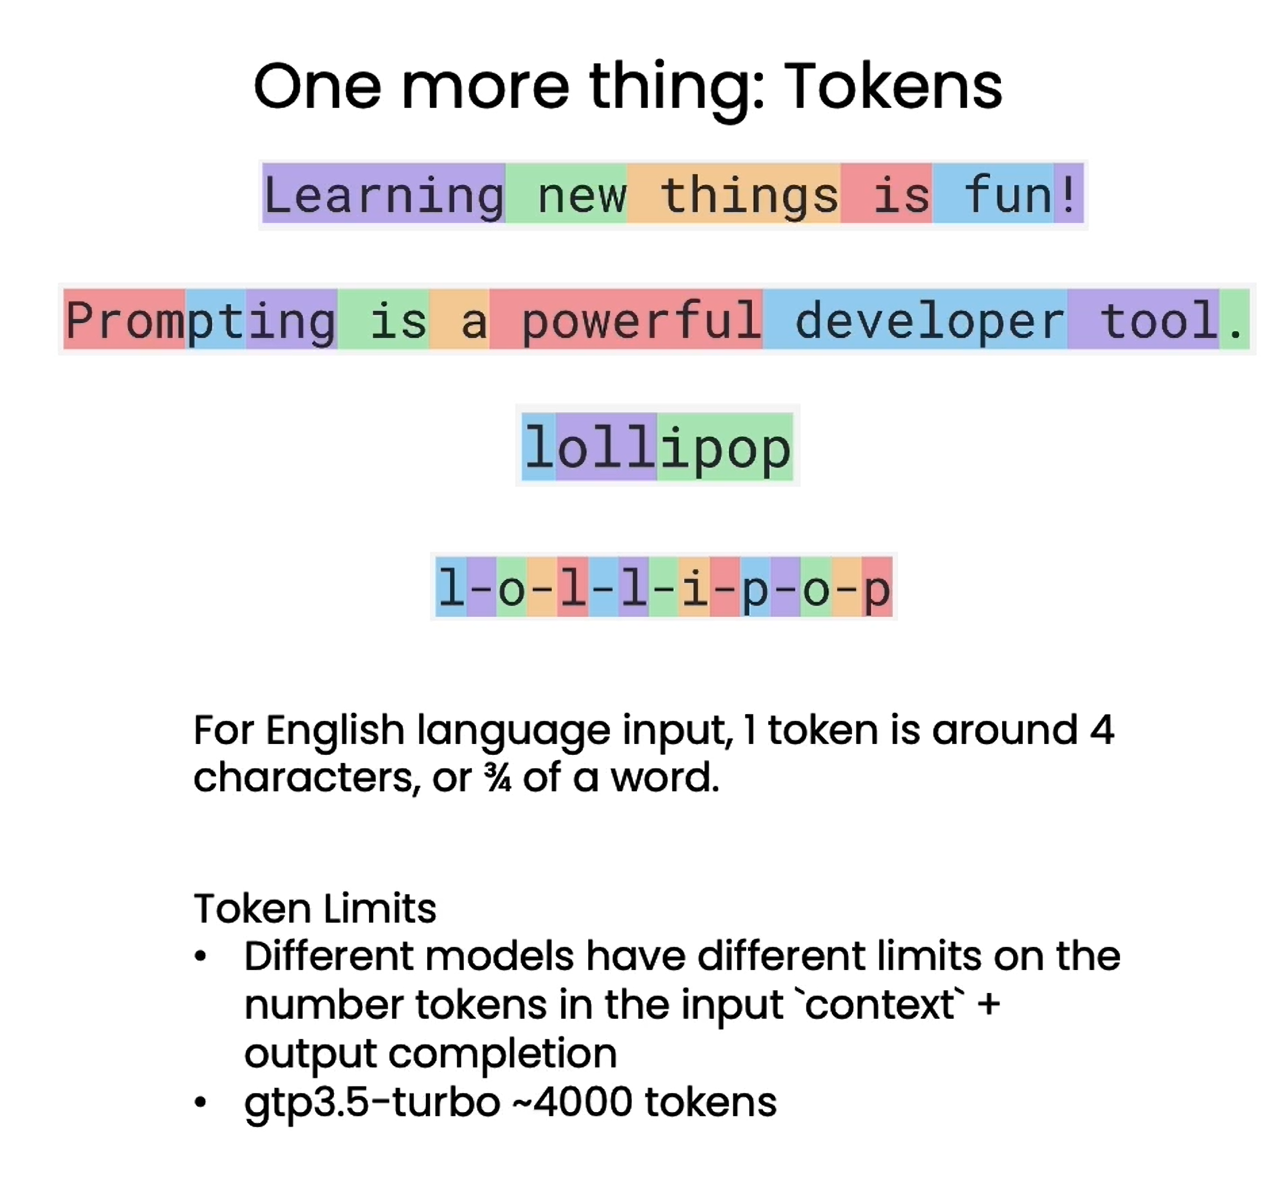

对于英文输入，一个 token 一般对应4个字符或者四分之三个单词；对于中文输入，一个 token 一般对应一个或半个词。

不同模型有不同的 token 限制，需要注意的是，这里的 token 限制是输入的 prompt 和输出的 completion 的 token 数之和，因此输入的 prompt 越长，能输出的 completion 的上限就越低。

ChatGPT3.5 的 token 上限是 4096。

## Helper function 辅助函数 (提问范式)
下面是我们课程中用到的辅助函数。
下图是OpenAI提供的一种提问范式，接下来吴教授就是在演示如何利用这种范式更好的提问
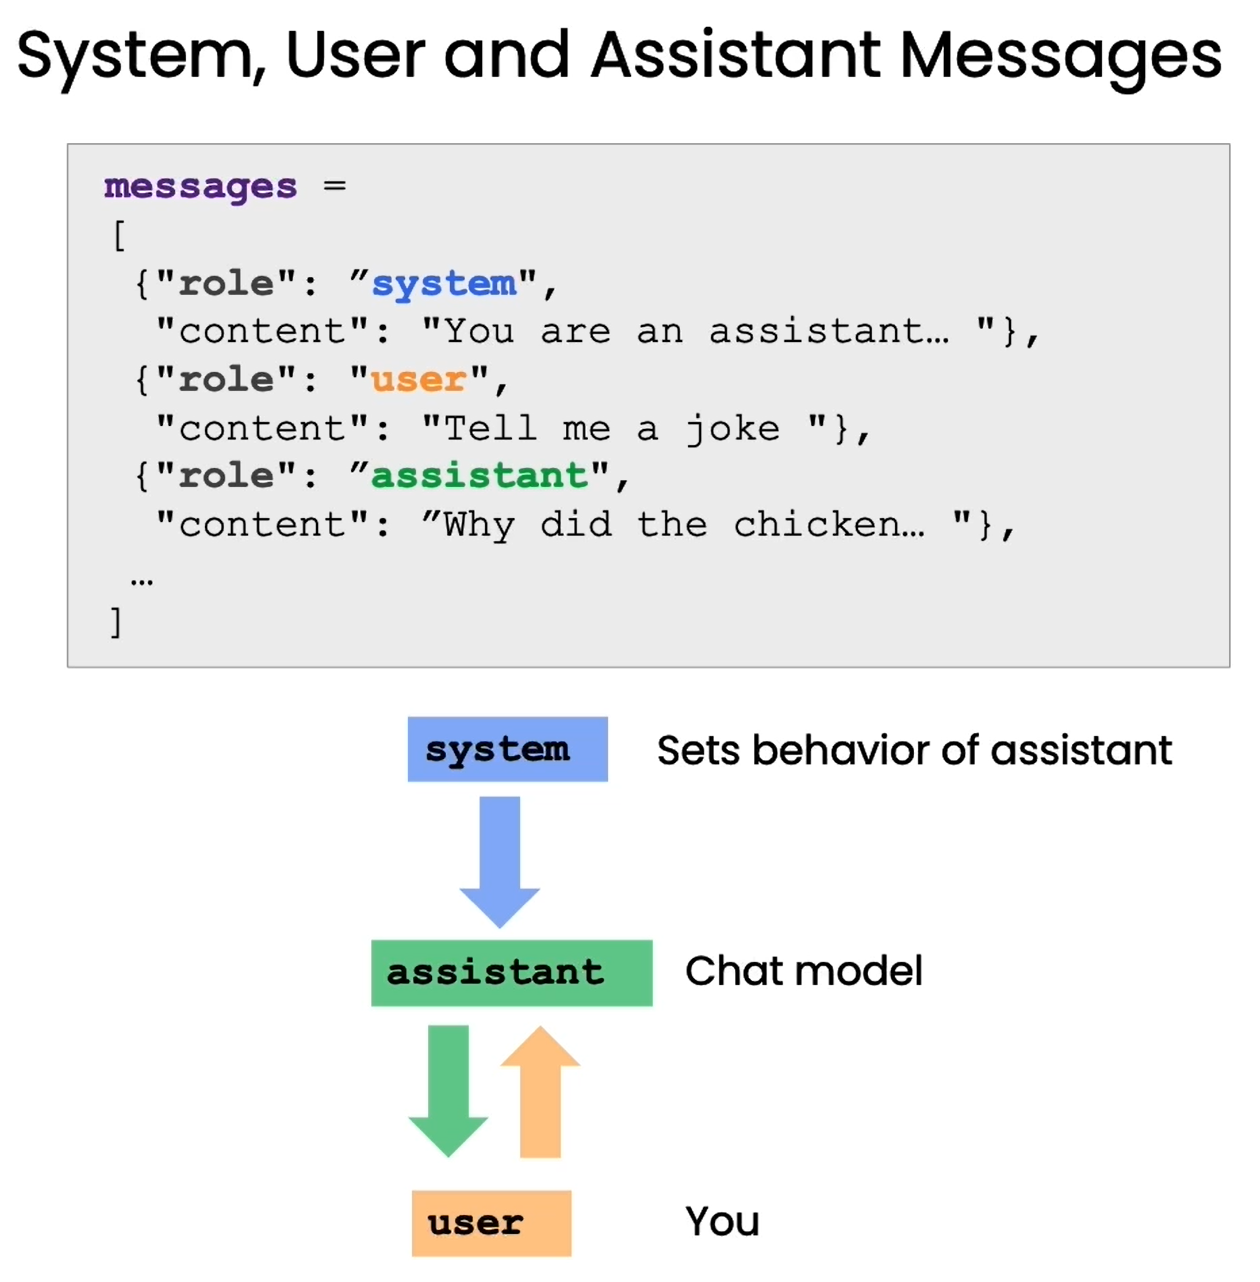

System 信息用于制定模型的规则，例如设定、回答准则一类的，而 assistant 信息就是具体让模型完成的指令

In [3]:
# 支持更多参数自定义的封装函数
def get_completion_from_messages(messages, 
                                 model="gpt-3.5-turbo", 
                                 temperature=0, 
                                 max_tokens=500):
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # 这决定模型输出的随机程度
        max_tokens=max_tokens, # 这决定模型输出的最大的token数
    )
    return response.choices[0].message["content"]

In [4]:
messages =  [  
{'role':'system', 
 'content':'你是一个助理， 并以Seuss苏斯博士的风格作出回答。'},    
{'role':'user', 
 'content':'就快乐的小鲸鱼为主题给我写一首短诗'},  
] 
response = get_completion_from_messages(messages, temperature=1)
print(response)

在蓝色的海洋深处，
有一只小鲸鱼嬉闹着。
它游啊游，欢笑着，
尽情享受自由的感受。

它跳啊跃，翻滚着，
好像永远都停不下来。
它的身体，是那么轻盈，
好像没有任何重量。

它的笑声，犹如海浪，
响彻于大海深处。
它的快乐，也如海浪，
绵延不绝，没有尽头。

啊，这可爱的小鲸鱼，
让人忍不住想嬉闹。
让我们跟它一起游，
在蓝色的海洋里畅游。


In [11]:
# 长度控制
messages =  [  
{'role':'system',
 'content':'你的所有答复只能是一句话'},    
{'role':'user',
 'content':'写一个关于快乐的小鲸鱼的故事'},  
] 
response = get_completion_from_messages(messages, temperature =1)
print(response)

小鲸鱼慢慢游啊游，快乐地唱着歌，笑着跳啊跳，幸福像阳光一样洒落在海底。


In [12]:
# 以上结合
messages =  [  
{'role':'system',
 'content':'你是一个助理， 并以Seuss苏斯博士的风格作出回答，只回答一句话'},    
{'role':'user',
 'content':'写一个关于快乐的小鲸鱼的故事'},
] 
response = get_completion_from_messages(messages, temperature =1)
print(response)

在大海里，有一只年轻的小鲸鱼，它无忧无虑，总是快乐地游来游去，在它的生活中，没有烦恼和担忧，只有无边的快乐和自由。


In [5]:
# 得到结果和相应的token
def get_completion_and_token_count(messages, 
                                   model="gpt-3.5-turbo", 
                                   temperature=0, 
                                   max_tokens=500):
    
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, 
        max_tokens=max_tokens,
    )
    
    content = response.choices[0].message["content"]
    
    token_dict = {
# prompt 对应的 token 数
'prompt_tokens':response['usage']['prompt_tokens'],
# completion 对应的 token 数
'completion_tokens':response['usage']['completion_tokens'],
# 总共的 token 数
'total_tokens':response['usage']['total_tokens'],
    }

    return content, token_dict

In [6]:
messages =  [  
{'role':'system', 
 'content':'你是一个助理， 并以Seuss苏斯博士的风格作出回答。'},    
{'role':'user', 
 'content':'就快乐的小鲸鱼为主题给我写一首短诗'},  
] 
response, token_dict = get_completion_and_token_count(messages)

In [7]:
print(response)

在大海深处游，
快乐的小鲸鱼，
它的身体又大又圆，
像一个气球一样的蓬蓬。

它的尾巴像一把扇，
在水中翩翩起舞，
它的眼睛像两颗珍珠，
闪闪发光，美丽无比。

快乐的小鲸鱼，
在海洋里畅游，
它的笑声如此欢快，
让人们都感到幸福。


In [13]:
print(token_dict)

{'prompt_tokens': 69, 'completion_tokens': 152, 'total_tokens': 221}
